In [135]:
# Install Libraries
!pip install textblob
!pip install tweepy
!pip install pycountry
!pip install langdetect

In [136]:
!pip install twython

In [137]:
# Import Libraries

from textblob import TextBlob
import sys
import tweepy
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import nltk
import pycountry
import re
import string
import nltk
nltk.download('vader_lexicon')

from wordcloud import WordCloud, STOPWORDS
from PIL import Image
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from langdetect import detect
from nltk.stem import SnowballStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from sklearn.feature_extraction.text import CountVectorizer


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [138]:
# Authentication
consumerKey = "gUIdZMZZ19d2gSKZXuGGvW9md"
consumerSecret = "OL2jUTHCAiD1tVMpG8HEZPNrLvv2k2bZEvfiHG98ni0ZlgZIM3"
accessToken = "1167799665716162560-ACK1ptYqcNpKSVPM8HZPyYQBAyGohB"
accessTokenSecret = "PrZgewTuPewathRbXsWTQpztPONViQEZLtTFVgGhomBB2"

auth = tweepy.OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)
api = tweepy.API(auth)

In [139]:
#Sentiment Analysis

def percentage(part,whole):
    return 100 * float(part)/float(whole) 

keyword = input("Please enter keyword or hashtag to search: ")
noOfTweet = int(input ("Please enter how many tweets to analyze: "))


tweets = tweepy.Cursor(api.search, q=keyword).items(noOfTweet)
positive  = 0
negative = 0
neutral = 0
polarity = 0
tweet_list = []
neutral_list = []
negative_list = []
positive_list = []

for tweet in tweets:
    
    #print(tweet.text)
    tweet_list.append(tweet.text)
    analysis = TextBlob(tweet.text)
    score = SentimentIntensityAnalyzer().polarity_scores(tweet.text)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    polarity += analysis.sentiment.polarity
    
    if neg > pos:
        negative_list.append(tweet.text)
        negative += 1

    elif pos > neg:
        positive_list.append(tweet.text)
        positive += 1
    
    elif pos == neg:
        neutral_list.append(tweet.text)
        neutral += 1

positive = percentage(positive, noOfTweet)
negative = percentage(negative, noOfTweet)
neutral = percentage(neutral, noOfTweet)
polarity = percentage(polarity, noOfTweet)
positive = format(positive, '.1f')
negative = format(negative, '.1f')
neutral = format(neutral, '.1f')

Please enter keyword or hashtag to search: JohnnyDeppVsAmberHeard
Please enter how many tweets to analyze: 2500


In [140]:
#Number of Tweets (Total, Positive, Negative, Neutral)
tweet_list = pd.DataFrame(tweet_list)
neutral_list = pd.DataFrame(neutral_list)
negative_list = pd.DataFrame(negative_list)
positive_list = pd.DataFrame(positive_list)
print("total number: ",len(tweet_list))
print("positive number: ",len(positive_list))
print("negative number: ", len(negative_list))
print("neutral number: ",len(neutral_list))

total number:  2500
positive number:  588
negative number:  1207
neutral number:  705


In [141]:
tweet_list

,0
0,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...
1,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...
2,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...
3,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...
4,"RT @johnny_depp_law: Johnny spent £40,000 on c..."
...,...
2495,RT @laurenhiggins_: Elaine waiting for Ben Che...
2496,RT @ny_paralegal: #JohnnyDepp's Security Guard...
2497,RT @this_safe_place: If Sony can recast Kevin ...
2498,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...


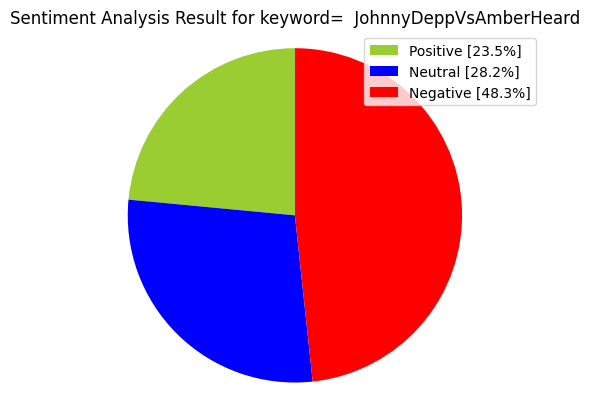

In [142]:
#Creating PieCart

labels = ['Positive ['+str(positive)+'%]' , 'Neutral ['+str(neutral)+'%]','Negative ['+str(negative)+'%]']
sizes = [positive, neutral, negative]
colors = ['yellowgreen', 'blue','red']
patches, texts = plt.pie(sizes,colors=colors, startangle=90)
plt.style.use('default')
plt.legend(labels)
plt.title("Sentiment Analysis Result for keyword=  "+keyword+"" )
plt.axis('equal')
plt.show()

In [114]:
tweet_list.drop_duplicates(inplace = True)

#Extracting text values
text_all = tweet_list[0].values
text_neutral = neutral_list[0].values
text_positive = positive_list[0].values
text_negative = negative_list[0].values

In [115]:
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]
tw_list

,0,text
0,RT @this_safe_place: Amber Heard lawyer: so yo...,RT @this_safe_place: Amber Heard lawyer: so yo...
1,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...
2,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...
3,RT @ThatUmbrella: Google trends showing the KE...,RT @ThatUmbrella: Google trends showing the KE...
4,RT @this_safe_place: If Sony can recast Kevin ...,RT @this_safe_place: If Sony can recast Kevin ...
...,...,...
2488,"Dear Turders,\nWe are not all Johnny Depp stan...","Dear Turders,\nWe are not all Johnny Depp stan..."
2493,I see a lot of fake bot accounts going negativ...,I see a lot of fake bot accounts going negativ...
2496,RT @Smashvillian615: Richard Marks is making t...,RT @Smashvillian615: Richard Marks is making t...
2497,The photos @realamberheard claim to have been ...,The photos @realamberheard claim to have been ...


In [116]:
tweet_list

,0,text
0,RT @this_safe_place: Amber Heard lawyer: so yo...,RT @this_safe_place: Amber Heard lawyer: so yo...
1,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...
2,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...
3,RT @ThatUmbrella: Google trends showing the KE...,RT @ThatUmbrella: Google trends showing the KE...
4,RT @this_safe_place: If Sony can recast Kevin ...,RT @this_safe_place: If Sony can recast Kevin ...
...,...,...
2488,"Dear Turders,\nWe are not all Johnny Depp stan...","Dear Turders,\nWe are not all Johnny Depp stan..."
2493,I see a lot of fake bot accounts going negativ...,I see a lot of fake bot accounts going negativ...
2496,RT @Smashvillian615: Richard Marks is making t...,RT @Smashvillian615: Richard Marks is making t...
2497,The photos @realamberheard claim to have been ...,The photos @realamberheard claim to have been ...


In [123]:
#Cleaning Text (RT, Punctuation etc)

#Creating new dataframe and new features
tw_list = pd.DataFrame(tweet_list)
tw_list["text"] = tw_list[0]

#Removing RT, Punctuation etc
remove_rt = lambda x: re.sub('RT @\w+: '," ",x)
rt = lambda x: re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",x)
tw_list["text"] = tw_list.text.map(remove_rt).map(rt)
tw_list["text"] = tw_list.text.str.lower()
tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @this_safe_place: Amber Heard lawyer: so yo...,amber heard lawyer so you don t know if the ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...,omigosh johnnydeppamberheardtrial jo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...,the johnnydeppvsamberheard trial shows us a ...,0.000000,0.228571,negative,0.148,0.852,0.000,-0.5106
3,RT @ThatUmbrella: Google trends showing the KE...,google trends showing the key spikes for john...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @this_safe_place: If Sony can recast Kevin ...,if sony can recast kevin spacey and do a whol...,-0.021212,0.484848,negative,0.163,0.837,0.000,-0.5423
6,RT @this_safe_place: PLS I CANNOT Amber Heard'...,pls i cannot amber heard s new pr firm tried ...,-0.047159,0.251136,positive,0.093,0.796,0.111,-0.1531
8,RT @tasteofsanity: From Erin Boerum's notes: A...,from erin boerum s notes amber heard who al...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
14,RT @casidensmore: How is Amber allowed to fire...,how is amber allowed to fire pr team for bad...,-0.700000,0.666667,negative,0.247,0.753,0.000,-0.7096
15,RT @bookswithsteph: Amber Heard managed to rec...,amber heard managed to record every part of h...,-0.100000,0.100000,negative,0.148,0.852,0.000,-0.5106
16,Ayo people on the internet gotta chill 🤣🤣🤣🤣🤣🤣...,ayo people on the internet gotta chill ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [124]:
#Calculating Negative, Positive, Neutral and Compound values

tw_list[['polarity', 'subjectivity']] = tw_list['text'].apply(lambda Text: pd.Series(TextBlob(Text).sentiment))
for index, row in tw_list['text'].iteritems():
    score = SentimentIntensityAnalyzer().polarity_scores(row)
    neg = score['neg']
    neu = score['neu']
    pos = score['pos']
    comp = score['compound']
    if neg > pos:
        tw_list.loc[index, 'sentiment'] = "negative"
    elif pos > neg:
        tw_list.loc[index, 'sentiment'] = "positive"
    else:
        tw_list.loc[index, 'sentiment'] = "neutral"
    tw_list.loc[index, 'neg'] = neg
    tw_list.loc[index, 'neu'] = neu
    tw_list.loc[index, 'pos'] = pos
    tw_list.loc[index, 'compound'] = comp

tw_list.head(10)

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound
0,RT @this_safe_place: Amber Heard lawyer: so yo...,amber heard lawyer so you don t know if the ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
1,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...,omigosh johnnydeppamberheardtrial jo...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
2,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...,the johnnydeppvsamberheard trial shows us a ...,0.000000,0.228571,negative,0.148,0.852,0.000,-0.5106
3,RT @ThatUmbrella: Google trends showing the KE...,google trends showing the key spikes for john...,0.000000,1.000000,neutral,0.000,1.000,0.000,0.0000
4,RT @this_safe_place: If Sony can recast Kevin ...,if sony can recast kevin spacey and do a whol...,-0.021212,0.484848,negative,0.163,0.837,0.000,-0.5423
6,RT @this_safe_place: PLS I CANNOT Amber Heard'...,pls i cannot amber heard s new pr firm tried ...,-0.047159,0.251136,positive,0.093,0.796,0.111,-0.1531
8,RT @tasteofsanity: From Erin Boerum's notes: A...,from erin boerum s notes amber heard who al...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000
14,RT @casidensmore: How is Amber allowed to fire...,how is amber allowed to fire pr team for bad...,-0.700000,0.666667,negative,0.247,0.753,0.000,-0.7096
15,RT @bookswithsteph: Amber Heard managed to rec...,amber heard managed to record every part of h...,-0.100000,0.100000,negative,0.148,0.852,0.000,-0.5106
16,Ayo people on the internet gotta chill 🤣🤣🤣🤣🤣🤣...,ayo people on the internet gotta chill ...,0.000000,0.000000,neutral,0.000,1.000,0.000,0.0000


In [125]:
#Creating new data frames for all sentiments (positive, negative and neutral)

tw_list_negative = tw_list[tw_list["sentiment"]=="negative"]
tw_list_positive = tw_list[tw_list["sentiment"]=="positive"]
tw_list_neutral = tw_list[tw_list["sentiment"]=="neutral"]

In [126]:
#Function for count_values_in single columns

def count_values_in_column(data,feature):
    total=data.loc[:,feature].value_counts(dropna=False)
    percentage=round(data.loc[:,feature].value_counts(dropna=False,normalize=True)*100,2)
    return pd.concat([total,percentage],axis=1,keys=['Total','Percentage'])

In [127]:
#Count_values for sentiment
count_values_in_column(tw_list,"sentiment")

,Total,Percentage
negative,229,33.78
positive,226,33.33
neutral,223,32.89


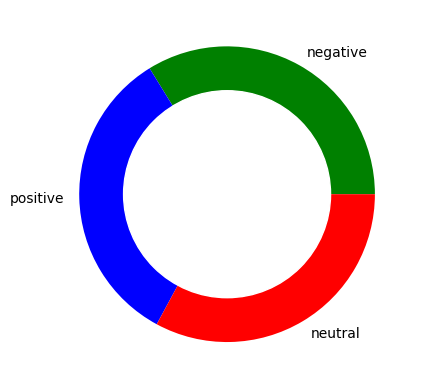

In [128]:
# create data for Pie Chart
pichart = count_values_in_column(tw_list,"sentiment")
names= pichart.index
size=pichart["Percentage"]
 
# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(size, labels=names, colors=['green','blue','red'])
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [129]:
#Function to Create Wordcloud

def create_wordcloud(text):
    # mask = np.array(Image.open("cloud.png"))
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                  mask = None,
                  max_words=3000,
                  stopwords=stopwords,
                  repeat=True)
    # wc.generate(str(text))
    # wc.to_file("wc.png")
    # print("Word Cloud Saved Successfully")
    # path="wc.png"
    display(wc.generate(str(text)))

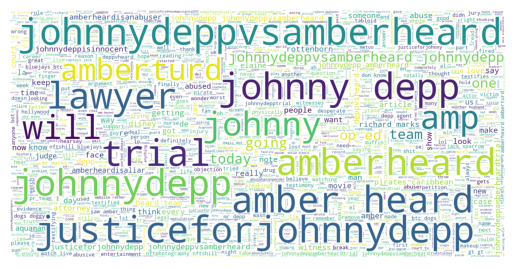

In [130]:
#Creating wordcloud for all tweets
fff=" ".join(tw_list["text"].values)
# importing the necessary modules:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
stopwords = set(STOPWORDS)
# text = open("data/peace_and_love.txt").read()

wordcloud = WordCloud(width=1600, 
                      height=800,background_color="white",max_words=3000,
                  stopwords=stopwords,
                  repeat=True).generate(fff)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

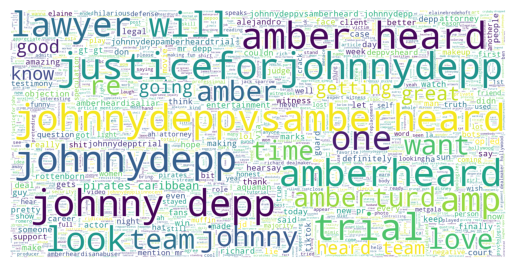

In [131]:
#Creating wordcloud for positive sentiment
# create_wordcloud(tw_list_positive["text"].values)
fff=" ".join(tw_list_positive["text"].values)
# importing the necessary modules:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
stopwords = set(STOPWORDS)
# text = open("data/peace_and_love.txt").read()

wordcloud = WordCloud(width=1600, 
                      height=800,background_color="white",max_words=3000,
                  stopwords=stopwords,
                  repeat=True).generate(fff)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

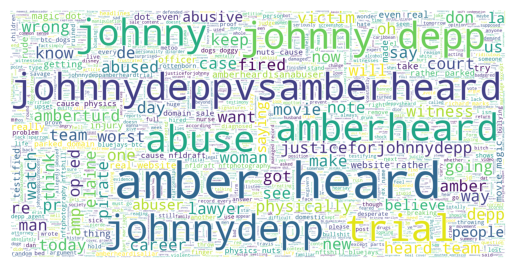

In [132]:
#Creating wordcloud for negative sentiment
# create_wordcloud(tw_list_negative["text"].values)

# create_wordcloud(tw_list_positive["text"].values)
fff=" ".join(tw_list_negative["text"].values)
# importing the necessary modules:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
stopwords = set(STOPWORDS)
# text = open("data/peace_and_love.txt").read()

wordcloud = WordCloud(width=1600, 
                      height=800,background_color="white",max_words=3000,
                  stopwords=stopwords,
                  repeat=True).generate(fff)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

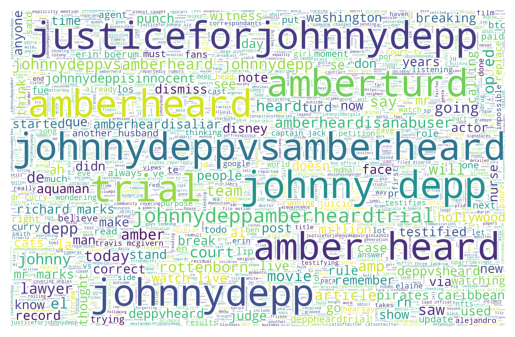

In [133]:
#Creating wordcloud for neutral sentiment
# create_wordcloud(tw_list_neutral["text"].values)


fff=" ".join(tw_list_neutral["text"].values)
# importing the necessary modules:
import numpy as np
import pandas as pd
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import matplotlib.pyplot as plt
from PIL import Image
stopwords = set(STOPWORDS)
# text = open("data/peace_and_love.txt").read()

wordcloud = WordCloud(width=2500, 
                      height=1600,background_color="white",max_words=3000,
                  stopwords=stopwords,
                  repeat=True).generate(fff)

# Display the generated image:
plt.imshow(wordcloud)
plt.axis("off")
plt.show()


In [144]:
#Calculating tweet's lenght and word count
tw_list['text_len'] = tw_list['text'].astype(str).apply(len)
tw_list['text_word_count'] = tw_list['text'].apply(lambda x: len(str(x).split()))

In [145]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_len.mean()),2)

,text_len
sentiment,
negative,114.95
neutral,101.85
positive,113.08


In [146]:
round(pd.DataFrame(tw_list.groupby("sentiment").text_word_count.mean()),2)

,text_word_count
sentiment,
negative,19.23
neutral,13.97
positive,18.01


In [147]:
#Removing Punctuation
def remove_punct(text):
    text  = "".join([char for char in text if char not in string.punctuation])
    text = re.sub('[0-9]+', '', text)
    return text

tw_list['punct'] = tw_list['text'].apply(lambda x: remove_punct(x))

In [148]:
#Appliyng tokenization
def tokenization(text):
    text = re.split('\W+', text)
    return text

tw_list['tokenized'] = tw_list['punct'].apply(lambda x: tokenization(x.lower()))

In [149]:
#Removing stopwords
import nltk
nltk.download('stopwords')
stopword = nltk.corpus.stopwords.words('english')
def remove_stopwords(text):
    text = [word for word in text if word not in stopword]
    return text
    
tw_list['nonstop'] = tw_list['tokenized'].apply(lambda x: remove_stopwords(x))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [150]:
#Appliyng Stemmer
ps = nltk.PorterStemmer()

def stemming(text):
    text = [ps.stem(word) for word in text]
    return text

tw_list['stemmed'] = tw_list['nonstop'].apply(lambda x: stemming(x))

In [151]:
#Cleaning Text
def clean_text(text):
    text_lc = "".join([word.lower() for word in text if word not in string.punctuation]) # remove puntuation
    text_rc = re.sub('[0-9]+', '', text_lc)
    tokens = re.split('\W+', text_rc)    # tokenization
    text = [ps.stem(word) for word in tokens if word not in stopword]  # remove stopwords and stemming
    return text

In [152]:
tw_list.head()

,0,text,polarity,subjectivity,sentiment,neg,neu,pos,compound,text_len,text_word_count,punct,tokenized,nonstop,stemmed
0,RT @this_safe_place: Amber Heard lawyer: so yo...,amber heard lawyer so you don t know if the ...,0.000000,0.000000,neutral,0.000,1.000,0.0,0.0000,119,23,amber heard lawyer so you don t know if the ...,"[, amber, heard, lawyer, so, you, don, t, know...","[, amber, heard, lawyer, know, op, ed, johnny,...","[, amber, heard, lawyer, know, op, ed, johnni,..."
1,Omigosh 💀💀💀💀💀💀💀 #JohnnyDeppAmberHeardTrial #Jo...,omigosh johnnydeppamberheardtrial jo...,0.000000,0.000000,neutral,0.000,1.000,0.0,0.0000,80,4,omigosh johnnydeppamberheardtrial jo...,"[omigosh, johnnydeppamberheardtrial, johnnydep...","[omigosh, johnnydeppamberheardtrial, johnnydep...","[omigosh, johnnydeppamberheardtri, johnnydeppv..."
2,RT @Angel_Devil982: The #JohnnyDeppVsAmberHear...,the johnnydeppvsamberheard trial shows us a ...,0.000000,0.228571,negative,0.148,0.852,0.0,-0.5106,125,22,the johnnydeppvsamberheard trial shows us a ...,"[, the, johnnydeppvsamberheard, trial, shows, ...","[, johnnydeppvsamberheard, trial, shows, us, m...","[, johnnydeppvsamberheard, trial, show, us, ma..."
3,RT @ThatUmbrella: Google trends showing the KE...,google trends showing the key spikes for john...,0.000000,1.000000,neutral,0.000,1.000,0.0,0.0000,123,20,google trends showing the key spikes for john...,"[, google, trends, showing, the, key, spikes, ...","[, google, trends, showing, key, spikes, johnn...","[, googl, trend, show, key, spike, johnni, dep..."
4,RT @this_safe_place: If Sony can recast Kevin ...,if sony can recast kevin spacey and do a whol...,-0.021212,0.484848,negative,0.163,0.837,0.0,-0.5423,110,21,if sony can recast kevin spacey and do a whol...,"[, if, sony, can, recast, kevin, spacey, and, ...","[, sony, recast, kevin, spacey, whole, new, mo...","[, soni, recast, kevin, spacey, whole, new, mo..."


In [153]:
#Appliyng Countvectorizer
countVectorizer = CountVectorizer(analyzer=clean_text) 
countVector = countVectorizer.fit_transform(tw_list['text'])
print('{} Number of reviews has {} words'.format(countVector.shape[0], countVector.shape[1]))
#print(countVectorizer.get_feature_names())

678 Number of reviews has 1951 words


In [154]:
count_vect_df = pd.DataFrame(countVector.toarray(), columns=countVectorizer.get_feature_names())
count_vect_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,,abil,absolut,abt,abu,abus,abusehasnogend,acab,acaba,accept,...,yo,young,youtub,yr,yup,ze,zeg,zero,zip,zztop
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [155]:
# Most Used Words
count = pd.DataFrame(count_vect_df.sum())
countdf = count.sort_values(0,ascending=False).head(20)
countdf[1:11]

,0
johnnydeppvsamberheard,231
johnni,162
depp,161
amber,158
heard,150
johnnydepp,107
amberheard,86
justiceforjohnnydepp,79
trial,69
team,56


In [156]:
#Function to ngram
def get_top_n_gram(corpus,ngram_range,n=None):
    vec = CountVectorizer(ngram_range=ngram_range,stop_words = 'english').fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [157]:
#n2_bigram
n2_bigrams = get_top_n_gram(tw_list['text'],(2,2),20)

n2_bigrams

[('amber heard', 126),
 ('johnny depp', 124),
 ('johnnydeppvsamberheard johnnydepp', 30),
 ('op ed', 27),
 ('justiceforjohnnydepp johnnydeppvsamberheard', 24),
 ('johnnydepp johnnydeppvsamberheard', 22),
 ('heard team', 22),
 ('pirates caribbean', 17),
 ('johnnydeppvsamberheard trial', 13),
 ('richard marks', 13),
 ('johnnydeppamberheardtrial johnnydeppvsamberheard', 10),
 ('johnnydeppvsamberheard justiceforjohnnydepp', 10),
 ('justiceforjohnnydepp johnnydepp', 10),
 ('johnnydepp amberheard', 10),
 ('mr depp', 10),
 ('new pr', 9),
 ('looks like', 9),
 ('pr team', 8),
 ('jack sparrow', 8),
 ('amberheard amberturd', 8)]

In [98]:
#n3_trigram
n3_trigrams = get_top_n_gram(tw_list['text'],(3,3),20)

n3_trigrams

[('uk pm announce', 2),
 ('pm announce additional', 2),
 ('announce additional 376', 2),
 ('additional 376 million', 2),
 ('376 million military', 2),
 ('million military aid', 2),
 ('military aid ukraine', 2),
 ('war ukraine does', 2),
 ('ukraine does ukraine', 2),
 ('considering effectively ukraine', 2),
 ('effectively ukraine employing', 2),
 ('ukraine employing cots', 2),
 ('employing cots uavs', 2),
 ('cots uavs facilitate', 2),
 ('uavs facilitate artillery', 2),
 ('facilitate artillery generally', 2),
 ('artillery generally pgms', 2),
 ('biden asking 33', 1),
 ('asking 33 billion', 1),
 ('33 billion send', 1)]